# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB
None
              Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0

In [6]:

a=df.columns
type(list(a))

list

In [7]:
# Checking for disperancies in values of columns 
a=list(df.columns)
for i in range(1,len(a)):
    print(df[a[i]].value_counts())
    print(df[a[i]].nunique())
    print("\n")

18910    3
25869    2
26034    2
10555    2
9795     2
        ..
24163    1
25014    1
25727    1
29410    1
35662    1
Name: Mileage, Length: 791, dtype: int64
791


Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64
6


Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64
32


Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D  

### Tasks, Part 1

In [8]:
#Building a Liner Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df["Mileage"].values.reshape(-1,1)
Y = df["Price"].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("model Intercept:{} and Model Coefficent :{}".format(model.intercept_, model.coef_))
print("The Linear Eq. of the model is Y ={} * X+ {} ".format(model.intercept_, model.coef_))

model Intercept:[24764.55900606] and Model Coefficent :[[-0.1725205]]
The Linear Eq. of the model is Y =[24764.55900606] * X+ [[-0.1725205]] 


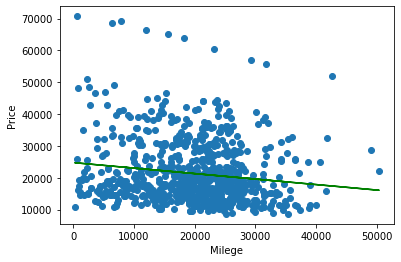

In [9]:
#plotting teh data with regression line 
plt.scatter(X,Y)
plt.plot(X,model.predict(X), color="green")
plt.xlabel("Milege")
plt.ylabel("Price")
plt.show()

In [10]:
#R2 score 
print(model.score(X,Y))

0.02046344732348926


### Tasks, Part 2

In [11]:
#takeing the asked columns 

cols=['Mileage', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x=df[cols]
y=df["Price"]

model = LinearRegression()
model.fit(x,y)

print("model intercept:{}, model Coefficents:{}".format(model.intercept_,model.coef_))
print(model.score(x,y))

model intercept:6758.755143598088, model Coefficents:[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
0.446264353672838


In [12]:
from itertools import combinations
Y= df["Price"]
fit_d={}
for i in range(1, len(cols)+1):
    for comb in combinations(cols ,i):
        X=df[list(comb)]
        model.fit(X,Y)
        fit_d[comb]=model.score(X,Y)
        
key_max=max(fit_d, key=fit_d.get)
fit_d

{('Mileage',): 0.02046344732348926,
 ('Cylinder',): 0.32385903759512247,
 ('Liter',): 0.31152674427904514,
 ('Doors',): 0.019251466591467037,
 ('Cruise',): 0.1856330092969275,
 ('Sound',): 0.015462387624189167,
 ('Leather',): 0.024710851264124534,
 ('Mileage', 'Cylinder'): 0.33982070826367505,
 ('Mileage', 'Liter'): 0.3291279066854157,
 ('Mileage', 'Doors'): 0.040399148671187324,
 ('Mileage', 'Cruise'): 0.2093138558315859,
 ('Mileage', 'Sound'): 0.03688121596735017,
 ('Mileage', 'Leather'): 0.04521956340886857,
 ('Cylinder', 'Liter'): 0.32591551601566593,
 ('Cylinder', 'Doors'): 0.343460536583038,
 ('Cylinder', 'Cruise'): 0.3839491324027343,
 ('Cylinder', 'Sound'): 0.32927527347959384,
 ('Cylinder', 'Leather'): 0.33698000644980575,
 ('Liter', 'Doors'): 0.3205156407766834,
 ('Liter', 'Cruise'): 0.3680458490296844,
 ('Liter', 'Sound'): 0.31926427639502886,
 ('Liter', 'Leather'): 0.32337917189904186,
 ('Doors', 'Cruise'): 0.19963824689216148,
 ('Doors', 'Sound'): 0.03701628770903431,
 ('D

In [13]:
 dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Sound',): 0.015462387624189167,
 ('Doors',): 0.019251466591467037,
 ('Mileage',): 0.02046344732348926,
 ('Leather',): 0.024710851264124534,
 ('Mileage', 'Sound'): 0.03688121596735017,
 ('Doors', 'Sound'): 0.03701628770903431,
 ('Mileage', 'Doors'): 0.040399148671187324,
 ('Doors', 'Leather'): 0.04141817346866039,
 ('Mileage', 'Leather'): 0.04521956340886857,
 ('Sound', 'Leather'): 0.04795369092082724,
 ('Mileage', 'Doors', 'Sound'): 0.05925054392042661,
 ('Mileage', 'Doors', 'Leather'): 0.06256392121987697,
 ('Doors', 'Sound', 'Leather'): 0.0668731331618887,
 ('Mileage', 'Sound', 'Leather'): 0.06965940622436517,
 ('Mileage', 'Doors', 'Sound', 'Leather'): 0.08933709379370725,
 ('Cruise',): 0.1856330092969275,
 ('Cruise', 'Sound'): 0.19288948066869638,
 ('Doors', 'Cruise'): 0.19963824689216148,
 ('Doors', 'Cruise', 'Sound'): 0.2083536888853531,
 ('Mileage', 'Cruise'): 0.2093138558315859,
 ('Mileage', 'Cruise', 'Sound'): 0.21721656906779285,
 ('Cruise', 'Leather'): 0.2210042052179847,


#### Combination of all 7 input fields i.e : 'Mileage',  'Cylinder',  'Liter',  'Doors',  'Cruise',  'Sound', 'Leather' produce the highest R2 score of 0.446264353672838



### Tasks, Hard Mode

In [16]:
df1 = df.copy()
df1[['Make','Model','Type', 'Trim']] = df1[['Make','Model','Type', 'Trim']].astype('category')
df1.dtypes # changeing columns haveing more categories 

Price        float64
Mileage        int64
Make        category
Model       category
Trim        category
Type        category
Cylinder       int64
Liter        float64
Doors          int64
Cruise         int64
Sound          int64
Leather        int64
dtype: object

In [17]:
df1['Make'] = df1['Make'].cat.codes
df1['Model'] = df1['Model'].cat.codes
df1['Type'] = df1['Type'].cat.codes
df1["Trim"] = df1['Trim'].cat.codes

In [18]:
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,21,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,21,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,21,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,21,3,6,3.0,4,1,1,0


In [19]:
#building columns
cols = ['Mileage','Cylinder','Make','Model','Type','Liter','Doors','Cruise','Sound','Leather', 'Trim']
X = df1[cols]
Y = df1['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[3955.2132499] ,Coefficients:[[-1.82004154e-01  4.86397766e+03  8.00296321e+02 -1.80197450e+02
  -2.30429315e+02 -8.84033409e+02 -7.75958942e+02  4.75064161e+03
  -1.29486285e+03  2.60361458e+03 -9.21695328e+01]]


0.5011334140890769

In [39]:
from itertools import combinations
cols = [x for x in df1.columns if x not in ['Price']]
Y = df1['Price']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df1[list(comb)]
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)
dict(sorted(fit_d.items(), key=lambda item: item[1]))

{('Model',): 0.0007075002353449378,
 ('Sound',): 0.015462387624189167,
 ('Model', 'Sound'): 0.01602771131072822,
 ('Make',): 0.017330023276849515,
 ('Doors',): 0.019251466591467037,
 ('Model', 'Doors'): 0.020174336109916702,
 ('Mileage',): 0.02046344732348926,
 ('Mileage', 'Model'): 0.021390341724401796,
 ('Make', 'Model'): 0.022033286303694943,
 ('Leather',): 0.024710851264124534,
 ('Model', 'Leather'): 0.024898082486207396,
 ('Type',): 0.02685384708720895,
 ('Model', 'Type'): 0.027385304380424413,
 ('Type', 'Doors'): 0.02740835346453363,
 ('Model', 'Type', 'Doors'): 0.027831081310477623,
 ('Mileage', 'Make'): 0.03674520415612559,
 ('Mileage', 'Sound'): 0.03688121596735017,
 ('Doors', 'Sound'): 0.03701628770903431,
 ('Make', 'Sound'): 0.037436090521062115,
 ('Mileage', 'Model', 'Sound'): 0.03764435284042078,
 ('Model', 'Doors', 'Sound'): 0.03777655613577835,
 ('Make', 'Leather'): 0.03950686905485046,
 ('Mileage', 'Doors'): 0.040399148671187324,
 ('Trim',): 0.041322585172820725,
 ('Mod

### conclusion 
from the above output it is clear that the combinations of all features give the best R2 score. 

In [30]:
# Task to use dummies on Make and Type columns 
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])
cols = [x for x in df_dummies.columns if x not in ['Price']]
#cols

X = df_dummies[cols]
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Model Intercept:{} ,Model Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Model Intercept:[24368.15100684] ,Model Coefficients:[[-1.87228568e-01  5.81184849e+01 -2.95717377e+01 -1.44287159e+03
   5.84339177e+03 -1.98200428e+03  2.12587012e+02  2.10879247e+02
   1.96945847e+02 -4.09726101e+03  1.25627194e+04 -5.20445720e+03
  -5.57530571e+03  7.22887506e+03 -4.91457057e+03  6.52286995e+03
  -5.53186781e+03 -1.52632788e+03 -1.40677340e+03  1.94209914e+03]]


0.9388684665383542

### Conclusion
The r2 score with the use of Dummies is 0.93 which is considered as a good score. 